In [1]:
#in this example  we dont have a hidden layer 
#soo in neural network we start with a simple archi then we will add hidden layers to improve the score 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

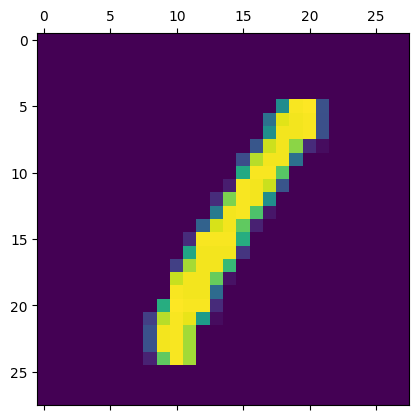

In [7]:
plt.matshow(x_train[3])

In [8]:
y_train[3]

1

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
#flat a 2 dimensions array to 1 dimension using reshape function in pandas library
x_train_flatten=x_train.reshape(len(x_train),28*28 )
x_test_flatten=x_test.reshape(len(x_test),28*28 )


In [13]:
x_train_flatten.shape

(60000, 784)

In [14]:
x_test_flatten.shape

(10000, 784)

** Create a simple neural network **

In [15]:
#sequential mean we have a stack of layers 
#10 is how neuron need for output 
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4685 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2828 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2661 - accuracy: 0.9257


In [16]:
#we need to scale values 0=>255 to values btw [0,1]  to get a high  accuracy 
model.evaluate(x_test_flatten,y_test)


313/313 [==============================] - 2s 6ms/step - loss: 0.2667 - accuracy: 0.9251


[0.2667137682437897, 0.9251000285148621]

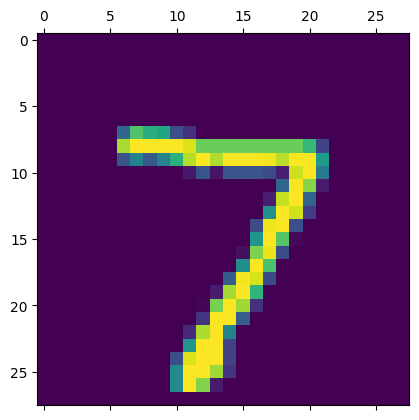

In [17]:
plt.matshow(x_test[0])

In [18]:
y_predicted=model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 2s 5ms/step


array([1.6423572e-02, 2.2796443e-07, 4.3061770e-02, 9.4233555e-01,
       1.7355691e-03, 8.8532381e-02, 1.1324081e-06, 9.9973661e-01,
       9.1796890e-02, 5.9203005e-01], dtype=float32)

In [19]:
#max of  array 
np.argmax(y_predicted[0])


7

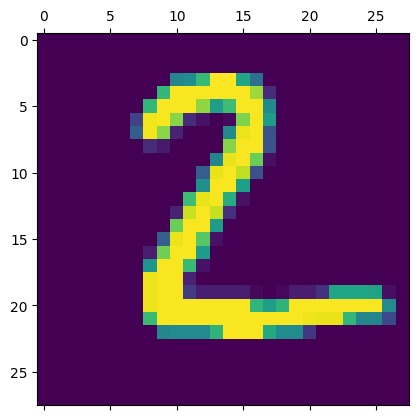

In [20]:
plt.matshow(x_test[1])

In [21]:
y_predicted=model.predict(x_test_flatten)
y_predicted[1]

313/313 [==============================] - 2s 5ms/step


array([4.0380460e-01, 3.8677612e-03, 9.9939346e-01, 4.7789523e-01,
       6.8510958e-10, 8.8477498e-01, 8.7716347e-01, 1.8372226e-12,
       2.4517788e-01, 3.8434997e-09], dtype=float32)

In [22]:
np.argmax(y_predicted[1])

2

In [23]:
#y_predicted is with shape of array with 2 dim we need to know the max in each predict array values to reshape it like y_test
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    6,    7,    2,    3,    1],
       [   0, 1106,    3,    2,    0,    1,    4,    2,   17,    0],
       [   5,    9,  915,   18,    6,    3,   13,   11,   47,    5],
       [   2,    0,   16,  925,    0,   21,    2,   12,   26,    6],
       [   2,    1,    4,    2,  907,    0,   11,    4,   11,   40],
       [   7,    2,    3,   35,    6,  779,   14,    5,   33,    8],
       [  11,    3,    6,    1,    7,   14,  910,    2,    4,    0],
       [   1,    5,   21,    7,    6,    0,    0,  947,    4,   37],
       [   4,    6,    7,   20,    9,   19,    9,   11,  883,    6],
       [  10,    7,    1,   10,   23,    4,    0,   24,    9,  921]])>

add hidden layers 

In [25]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2728 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1246 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0872 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0677 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0528 - accuracy: 0.9830


In [26]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0799 - accuracy: 0.9753


[0.07985350489616394, 0.9753000140190125]

In [27]:
#when we dont want to create a flatten array and want to do it in model creation 
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),#hidden layer with 100 neural 
    keras.layers.Dense(10,activation='sigmoid')#output layer
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2812 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1246 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0869 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0518 - accuracy: 0.9846
